<a href="https://colab.research.google.com/github/chancun2019/SVM-Machin-Learning/blob/main/Skrpsi_1_Data_Crawling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

In [ ]:
!git clone --depth=1 https://github.com/twintproject/twint.git
!cd /content/twint && pip3 install . -r requirements.txt

Saat ini library yang saya gunakan adalah twint. Akan tetapi sekarang karena kebijakan baru dari twitter, twint yang menggunakan guest token dari aws addres tidak lagi diberikan akses untuk mendapatkan guest token. Tetapi saya menyimpan data crawling sesuai dengan tanggal serta geolokasi yang tertuliskan code dibawah

Berikut saya lampirkan beberapa error dari gihub yang saya temui beserta alasannya dan belum dapat menemukan solusinya

[Error twint 1 - Could not find the Guest token in HTML 1433 ](https://github.com/twintproject/twint/issues/1433)
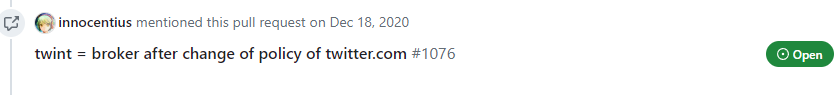

[Error twint 2 - Could not find the Guest token in HTML #1061 ](https://https://github.com/twintproject/twint/issues/1061) 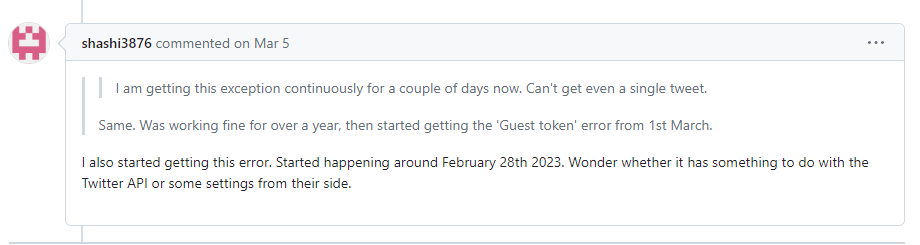

[Error twint 3 - Could not find the Guest token in HTML when run in Ubuntu Server (AWS EC2) #957](ttps://github.com/twintproject/twint/issues/957))
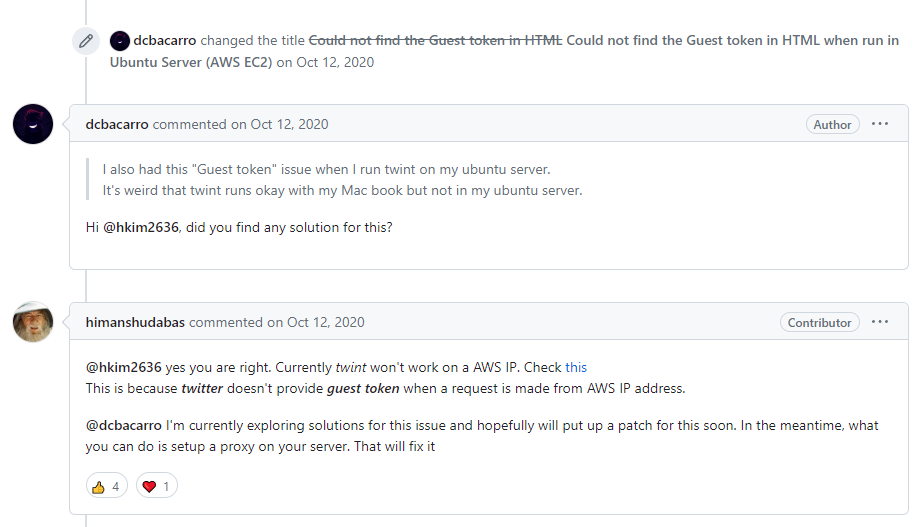

In [6]:
import twint
import pandas as pd

import nest_asyncio
nest_asyncio.apply()

In [7]:
c = twint.Config()
c.Search = "covid"
c.Search = "vaksin"
c.Since = "2020-01-13"
c.Until = "2022-11-22"
c.Geo = "-7.603740515040823, 110.97216165457705,12km"
c.Hide_output = True
c.Debug = True
c.Pandas = True

In [8]:
%%time
try:
    print("Start crawling")
    #convert output ke format data frame
    def twint_to_datafrme(columns):
        return twint.output.panda.Tweets_df[columns]

    #Start crawling
    twint.run.Search(c)
    #tlist = c.search_tweet_list

    #save data tertentu setelah crawling
    dataku = twint_to_datafrme(['date','username','tweet'])
except Exception as e:
    print(e)
print("Finisihed Crawling")
print("------------------")

Start crawling
Could not find the Guest token in HTML
Finisihed Crawling
------------------
CPU times: user 105 ms, sys: 771 µs, total: 106 ms
Wall time: 377 ms


In [ ]:
dataku.to_csv('data_crawling_terakhir_kali', index=False)

In [17]:
from google.colab import files
uploaded = files.upload()

Saving data_crawling_terakhir_kali.csv to data_crawling_terakhir_kali.csv


In [19]:
import io
dataku = pd.read_csv(io.BytesIO(uploaded['data_crawling_terakhir_kali.csv']))

In [20]:
dataku

,date,username,tweet
0,2022-11-22 06:53:52,AlbertSolo2,Direktur jenderal badan kesehatan dunia who me...
1,2022-11-21 17:28:03,dr_ardi,Semua negara di dunia ini menyerukan pentingny...
2,2022-11-21 16:58:52,Faiza_Abdullah7,@ato_uban @yo2thok Kirain tak ngefek vaksin pe...
3,2022-11-21 16:28:45,Faiza_Abdullah7,@ato_uban @yo2thok Sebelumnya dikira demam ber...
4,2022-11-21 15:58:26,Faiza_Abdullah7,@ato_uban @yo2thok Gejala timbul 5 hari setela...
...,...,...,...
1035,2020-03-13 16:13:23,ayucunyaaa,Aku mau pulanggggggg gamau vaksin ke moewardi
1036,2020-03-11 20:52:29,nikenarman,@animalfess2 Bisa aja si nder. Tp amannya di v...
1037,2020-03-01 17:46:10,masradensammy,"Welcome march, semoga virus corona segera mene..."
1038,2020-02-03 09:40:42,DeeRiry,@BudiTyas @pisvng @mazzini_giusepe Iya... Kata...
